# Make custom annotation for cell2location
___

A custom annotation which is the same as fine_grain except for the addition of "AtrialCardiomycoytesImmature"

The idea is to inspect whhether this signature is seen in the eary visium samples.

In [1]:
import pandas as pd
import os
import scanpy as sc

In [2]:
# read in custom annotation (only applied to aCMs of course)
annotation_df=pd.read_csv("AtrialCardiomyocytesImmature_annotation.csv",index_col=0)
annotation_df

,AtrialCardiomyocytesImmature_annotation
barcode,
BHF_F_Hea11933667_BHF_F_Hea11596620_CTTCTCAAGCGGTTAT-1,AtrialCardiomyocytesRight
BHF_F_Hea11933674_BHF_F_Hea11596627_GATTAGCTCAGCACGC-1,AtrialCardiomyocytesLeft
BHF_F_Hea11933674_BHF_F_Hea11596627_CATGCAAGTTAGGTGC-1,AtrialCardiomyocytesLeft
BHF_F_Hea11933668_BHF_F_Hea11596621_CCTTACTCAACACCTA-1,AtrialCardiomyocytesRight
BHF_F_Hea11933666_BHF_F_Hea11596619_AGCTTCCTCGTTATAG-1,AtrialCardiomyocytesLeft
...,...
BHF_F_Hea11064672_BHF_F_Hea11031825_GCACTTACAGCCAGAA-1,AtrialCardiomyocytesLeft
BHF_F_Hea11933669_BHF_F_Hea11596622_GCTAACAGTTAGAGGG-1,AtrialCardiomyocytesRight
BHF_F_Hea11933673_BHF_F_Hea11596626_GCCTATTGTGTGTCCC-1,AtrialCardiomyocytesImmature


In [3]:
# read in the main object
adata=sc.read_h5ad('/nfs/team205/heart/anndata_objects/Foetal/Feb28ObjectRaw.h5ad')
adata

AnnData object with n_obs × n_vars = 297473 × 36601
    obs: 'latent_RT_efficiency', 'latent_cell_probability', 'latent_scale', 'sangerID', 'combinedID', 'donor', 'region', 'age', 'facility', 'cell_or_nuclei', 'modality', 'kit_10x', 'scrublet_score', 'doublet_pval', 'doublet_bh_pval', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'HB_score', 'donor_by_library-prep', 'multiplexed', 'SOC | status', 'SOC | log_prob_singleton', 'SOC | log_prob_doublet', 'batch_key', '_scvi_batch', 'FACSgate', 'fine_grain', 'mid_grain', 'coarse_grain', 'sex', 'week', 'trimester', 'heart_or_greatvessels', 'cycling', 'S_score', 'G2M_score', 'phase', '_scvi_labels', 'stress_score', 'hb1_score'
    var: 'gene_name_scRNA-0', 'gene_id'
    uns: 'FACSgate_colors', '_scvi_manager_uuid', '_scvi_uuid', 'age_colors', 'cell_or_nucl

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


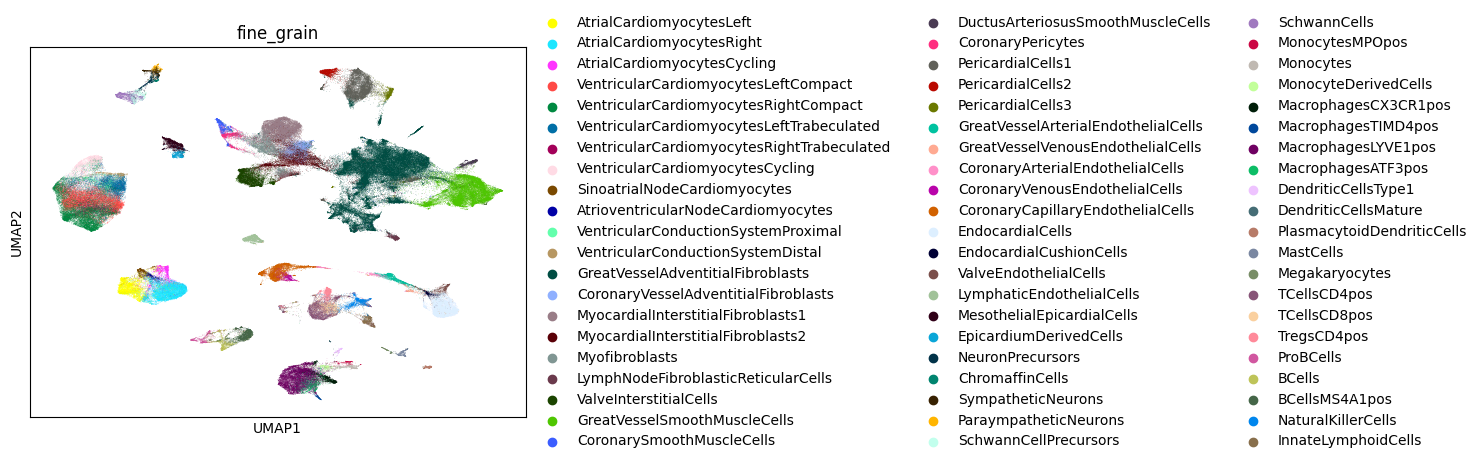

In [4]:
sc.pl.umap(adata,color="fine_grain")

In [ ]:
# Add updated label - we have 2 young and 2 old populations

immature_barcodes = annotation_df[annotation_df['AtrialCardiomyocytesImmature_annotation']=="AtrialCardiomyocytesImmature"].index

# Create a dictionary to hold the updates
updates = {}

for barcode in immature_barcodes:
    if barcode in adata.obs['fine_grain'].index:
        fine_grain_annotation = adata.obs['fine_grain'][barcode]
        if fine_grain_annotation == 'AtrialCardiomyocytesLeft':
            updates[barcode] = 'AtrialCardiomyocytesLeft_immature'
        elif fine_grain_annotation == 'AtrialCardiomyocytesRight':
            updates[barcode] = 'AtrialCardiomyocytesRight_immature'

annotation_df['AtrialCardiomyocytesImmature_annotation_v2'] = annotation_df['AtrialCardiomyocytesImmature_annotation']

# Apply the updates from the dictionary
for barcode, new_annotation in updates.items():
    annotation_df.loc[barcode, 'AtrialCardiomyocytesImmature_annotation_v2'] = new_annotation

In [21]:
annotation_df[['AtrialCardiomyocytesImmature_annotation','AtrialCardiomyocytesImmature_annotation_v2']].value_counts()

AtrialCardiomyocytesImmature_annotation  AtrialCardiomyocytesImmature_annotation_v2
AtrialCardiomyocytesLeft                 AtrialCardiomyocytesLeft                      2828
AtrialCardiomyocytesRight                AtrialCardiomyocytesRight                     2509
AtrialCardiomyocytesImmature             AtrialCardiomyocytesLeft_immature              213
                                         AtrialCardiomyocytesRight_immature             114
dtype: int64

In [23]:
annotation_df['AtrialCardiomyocytesImmature_annotation']

barcode
BHF_F_Hea11933667_BHF_F_Hea11596620_CTTCTCAAGCGGTTAT-1       AtrialCardiomyocytesRight
BHF_F_Hea11933674_BHF_F_Hea11596627_GATTAGCTCAGCACGC-1        AtrialCardiomyocytesLeft
BHF_F_Hea11933674_BHF_F_Hea11596627_CATGCAAGTTAGGTGC-1        AtrialCardiomyocytesLeft
BHF_F_Hea11933668_BHF_F_Hea11596621_CCTTACTCAACACCTA-1       AtrialCardiomyocytesRight
BHF_F_Hea11933666_BHF_F_Hea11596619_AGCTTCCTCGTTATAG-1        AtrialCardiomyocytesLeft
                                                                      ...             
BHF_F_Hea11064672_BHF_F_Hea11031825_GCACTTACAGCCAGAA-1        AtrialCardiomyocytesLeft
BHF_F_Hea11933669_BHF_F_Hea11596622_GCTAACAGTTAGAGGG-1       AtrialCardiomyocytesRight
BHF_F_Hea11933673_BHF_F_Hea11596626_GCCTATTGTGTGTCCC-1    AtrialCardiomyocytesImmature
BHF_F_Hea11064671_BHF_F_Hea11031824_CGTCAATAGCTAAGTC-1        AtrialCardiomyocytesLeft
BHF_F_Hea11064671_BHF_F_Hea11031824_CTTACTAGTTGTTGCT-1        AtrialCardiomyocytesLeft
Name: AtrialCardiomyocytesImmature_

/lustre/scratch126/cellgen/team205/jc48/miniconda3/envs/omni_env/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


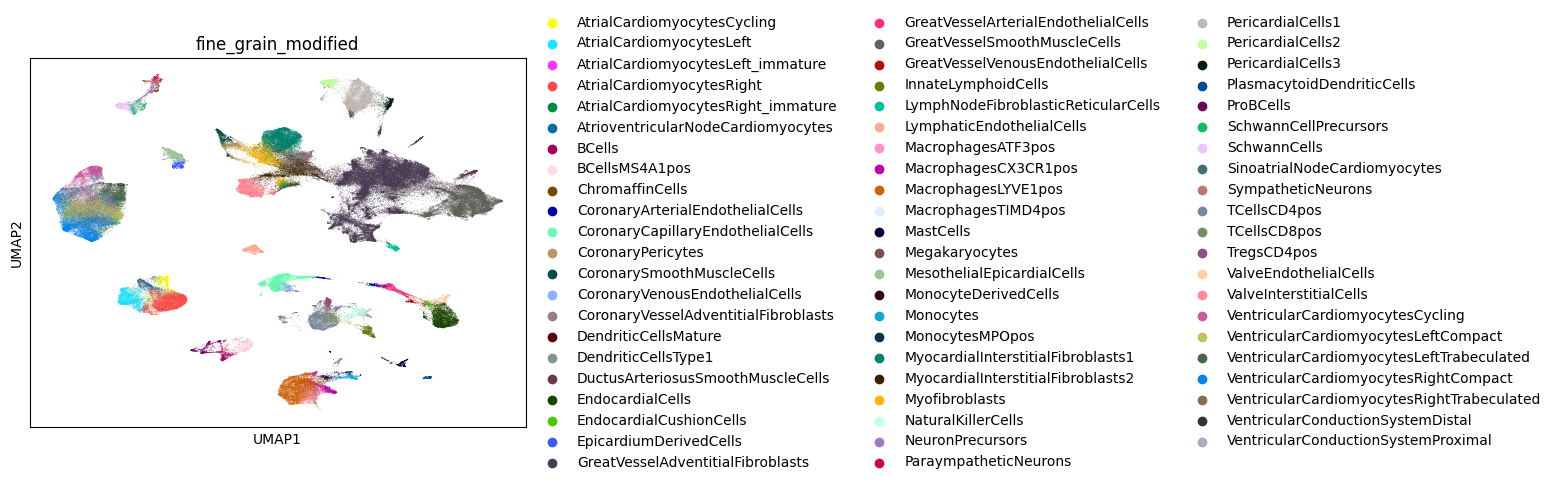

In [26]:
# Step 1: Initialize 'fine_grain_modified' with values from 'fine_grain' and convert to string
adata.obs['fine_grain_modified'] = adata.obs['fine_grain'].astype(str)

# Step 2: Update 'fine_grain_modified' for barcodes present in 'annotation_df'
for barcode in annotation_df.index:
    if barcode in adata.obs.index:
        new_value = annotation_df.at[barcode, 'AtrialCardiomyocytesImmature_annotation_v2']
        adata.obs.at[barcode, 'fine_grain_modified'] = new_value

# Optional: Convert 'fine_grain_modified' back to categorical
adata.obs['fine_grain_modified'] = adata.obs['fine_grain_modified'].astype('category')

sc.pl.umap(adata,color="fine_grain_modified")

In [27]:
adata.obs.fine_grain_modified.to_csv("fine_grain_modified.csv")

In [ ]:
bdata = adata[adata.obs]